In [204]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import sklearn as sk
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

In [153]:
df=pd.read_csv('/Users/Axele/python_files/ikea.csv')

# EDA

In [154]:
df.head()

,Unnamed: 0,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
0,0,90420332,FREKVENS,Bar furniture,265.0,No old price,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,NaN,99.0,51.0
1,1,368814,NORDVIKEN,Bar furniture,995.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette,NaN,105.0,80.0
2,2,9333523,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette,NaN,NaN,NaN
3,3,80155205,STIG,Bar furniture,69.0,No old price,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0
4,4,30180504,NORBERG,Bar furniture,225.0,No old price,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0


In [155]:
df.tail()

,Unnamed: 0,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
3689,3689,99157902,ELVARLI,Wardrobes,750.0,SR 820,True,https://www.ikea.com/sa/en/p/elvarli-1-section...,No,"1 section, 92x51x222-350 cm",Ehlén Johansson,50.0,NaN,91.0
3690,3690,9158152,ELVARLI,Wardrobes,1572.0,"SR 1,755",True,https://www.ikea.com/sa/en/p/elvarli-2-section...,No,"2 sections, 135x51x222-350 cm",Ehlén Johansson,50.0,NaN,135.0
3691,3691,59157541,ELVARLI,Wardrobes,924.0,"SR 1,050",True,https://www.ikea.com/sa/en/p/elvarli-2-section...,No,"2 sections, 175x51x222-350 cm",Ehlén Johansson,50.0,NaN,175.0
3692,3692,89157573,ELVARLI,Wardrobes,2745.0,"SR 3,130",True,https://www.ikea.com/sa/en/p/elvarli-3-section...,No,"3 sections, 178x51x222-350 cm",Ehlén Johansson,50.0,NaN,178.0
3693,3693,69157376,ELVARLI,Wardrobes,1231.0,"SR 1,535",True,https://www.ikea.com/sa/en/p/elvarli-2-section...,No,"2 sections, 175x51x222-350 cm",Ehlén Johansson,50.0,NaN,175.0


In [156]:
df.sample(10)

,Unnamed: 0,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
1127,1127,20339420,RENBERGET,Chairs,175.0,No old price,True,https://www.ikea.com/sa/en/p/renberget-swivel-...,No,Swivel chair,IKEA of Sweden,65.0,NaN,59.0
2516,2516,9277782,VALLENTUNA,Sofas & armchairs,4448.0,"SR 5,560",True,https://www.ikea.com/sa/en/p/vallentuna-3-seat...,Yes,3-seat modular sofa with sofa-bed,IKEA of Sweden/Fredriksson/L Löwenhielm/Hillan...,NaN,84.0,266.0
422,422,29286460,EKET,Bookcases & shelving units,1002.0,"SR 1,120",True,https://www.ikea.com/sa/en/p/eket-cabinet-comb...,Yes,"Cabinet combination with feet, ...",IKEA of Sweden/Jon Karlsson,35.0,72.0,280.0
1903,1903,49252553,LANGUR,Nursery furniture,400.0,No old price,True,https://www.ikea.com/sa/en/p/langur-junior-hig...,No,Junior/highchair with tray,J Fritzdorf/J Feldman/J Hedberg,61.0,87.0,56.0
2439,2439,59285384,VIMLE,Sofas & armchairs,1290.0,No old price,True,https://www.ikea.com/sa/en/p/vimle-chaise-long...,Yes,Chaise longue section,Ehlén Johansson,164.0,83.0,81.0
963,963,60347507,ENERYDA,Cabinets & cupboards,35.0,No old price,True,https://www.ikea.com/sa/en/p/eneryda-knob-bras...,Yes,"Knob, 35 mm",Francis Cayouette,NaN,NaN,NaN
208,208,79217902,SANDBACKEN,Beds,1841.0,"SR 1,950",True,https://www.ikea.com/sa/en/p/sandbacken-corner...,Yes,Corner sofa-bed,David Wahl/Lisa Hilland/IKEA of Sweden,NaN,69.0,212.0
1907,1907,50165079,BLÅMES,Nursery furniture,375.0,No old price,True,https://www.ikea.com/sa/en/p/blames-highchair-...,No,Highchair with tray,Tina Christensen,53.0,93.0,52.0
267,267,30428326,HYLLIS,Bookcases & shelving units,39.0,No old price,True,https://www.ikea.com/sa/en/p/hyllis-shelving-u...,No,"Shelving unit, 60x27x74 cm",IKEA of Sweden,27.0,74.0,60.0
101,101,40433902,MARKERAD,Beds,480.0,SR 800,True,https://www.ikea.com/sa/en/p/markerad-day-bed-...,No,"Day-bed frame, 80x200 cm",Virgil Abloh,NaN,20.0,80.0


In [157]:
df.shape


(3694, 14)

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3694 entries, 0 to 3693
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3694 non-null   int64  
 1   item_id            3694 non-null   int64  
 2   name               3694 non-null   object 
 3   category           3694 non-null   object 
 4   price              3694 non-null   float64
 5   old_price          3694 non-null   object 
 6   sellable_online    3694 non-null   bool   
 7   link               3694 non-null   object 
 8   other_colors       3694 non-null   object 
 9   short_description  3694 non-null   object 
 10  designer           3694 non-null   object 
 11  depth              2231 non-null   float64
 12  height             2706 non-null   float64
 13  width              3105 non-null   float64
dtypes: bool(1), float64(4), int64(2), object(7)
memory usage: 378.9+ KB


In [159]:
np.round(df.describe(),2)

,Unnamed: 0,item_id,price,depth,height,width
count,3694.00,3694.00,3694.00,2231.00,2706.00,3105.00
mean,1846.50,48632396.79,1078.21,54.38,101.68,104.47
std,1066.51,28887094.10,1374.65,29.96,61.10,71.13
min,0.00,58487.00,3.00,1.00,1.00,1.00
25%,923.25,20390574.00,180.90,38.00,67.00,60.00
50%,1846.50,49288078.00,544.70,47.00,83.00,80.00
75%,2769.75,70403572.75,1429.50,60.00,124.00,140.00
max,3693.00,99932615.00,9585.00,257.00,700.00,420.00


In [160]:
df.columns

Index(['Unnamed: 0', 'item_id', 'name', 'category', 'price', 'old_price',
       'sellable_online', 'link', 'other_colors', 'short_description',
       'designer', 'depth', 'height', 'width'],
      dtype='object')

In [161]:
df.category.unique()

array(['Bar furniture', 'Beds', 'Bookcases & shelving units',
       'Cabinets & cupboards', 'Café furniture', 'Chairs',
       'Chests of drawers & drawer units', "Children's furniture",
       'Nursery furniture', 'Outdoor furniture', 'Room dividers',
       'Sideboards, buffets & console tables', 'Sofas & armchairs',
       'Tables & desks', 'Trolleys', 'TV & media furniture', 'Wardrobes'],
      dtype=object)

In [166]:
df['sellable_online'].value_counts()

True     3666
False      28
Name: sellable_online, dtype: int64

### After all what we have seen, we can decide to delete "useless" columns. As 'item_id' and 'link' are unique for each item and can't prognose the price, we will delete them. Also, 'sellable_online' is not representative  and we will not use 'short_description' and 'name' for price prognosis.

In [167]:
df = df.drop(['item_id', 'link','sellable_online','name','short_description'], axis=1)
df.columns

Index(['Unnamed: 0', 'category', 'price', 'old_price', 'other_colors',
       'designer', 'depth', 'height', 'width'],
      dtype='object')

In [168]:
df.isnull().sum()

Unnamed: 0         0
category           0
price              0
old_price          0
other_colors       0
designer           0
depth           1463
height           988
width            589
dtype: int64

In [169]:
df.head()

,Unnamed: 0,category,price,old_price,other_colors,designer,depth,height,width
0,0,Bar furniture,265.0,No old price,No,Nicholai Wiig Hansen,NaN,99.0,51.0
1,1,Bar furniture,995.0,No old price,No,Francis Cayouette,NaN,105.0,80.0
2,2,Bar furniture,2095.0,No old price,No,Francis Cayouette,NaN,NaN,NaN
3,3,Bar furniture,69.0,No old price,Yes,Henrik Preutz,50.0,100.0,60.0
4,4,Bar furniture,225.0,No old price,No,Marcus Arvonen,60.0,43.0,74.0


### We will build histagrammes for some parameters

price


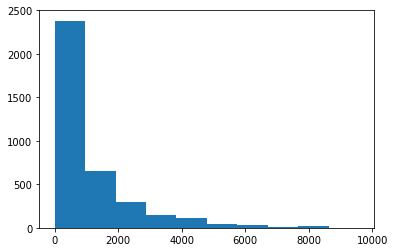

depth


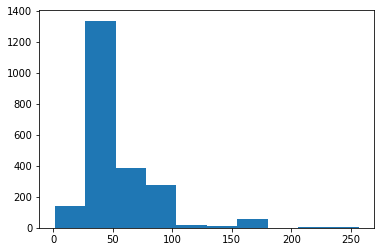

height


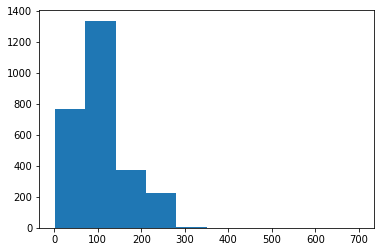

width


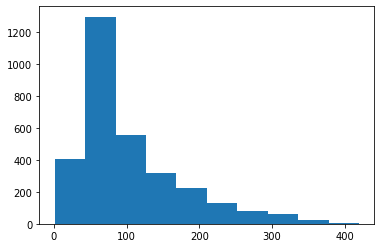

In [170]:
for col in ['price', 'depth', 'height', 'width']:
    print(col)
    plt.hist(df[col])
    plt.show()

### We can assume that these parameters have lognormal distribution

### histogram for categories 

[Text(0, 0, 'Bar furniture'),
 Text(1, 0, 'Beds'),
 Text(2, 0, 'Bookcases & shelving units'),
 Text(3, 0, 'Cabinets & cupboards'),
 Text(4, 0, 'Café furniture'),
 Text(5, 0, 'Chairs'),
 Text(6, 0, 'Chests of drawers & drawer units'),
 Text(7, 0, "Children's furniture"),
 Text(8, 0, 'Nursery furniture'),
 Text(9, 0, 'Outdoor furniture'),
 Text(10, 0, 'Room dividers'),
 Text(11, 0, 'Sideboards, buffets & console tables'),
 Text(12, 0, 'Sofas & armchairs'),
 Text(13, 0, 'Tables & desks'),
 Text(14, 0, 'Trolleys'),
 Text(15, 0, 'TV & media furniture'),
 Text(16, 0, 'Wardrobes')]

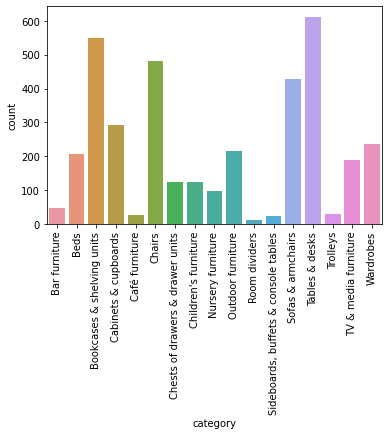

In [191]:
sns.countplot(x=df['category']).set_xticklabels(df['category'].unique(), rotation=90)

### Lower we can see that we have outliers in prices from the side of maximum prices

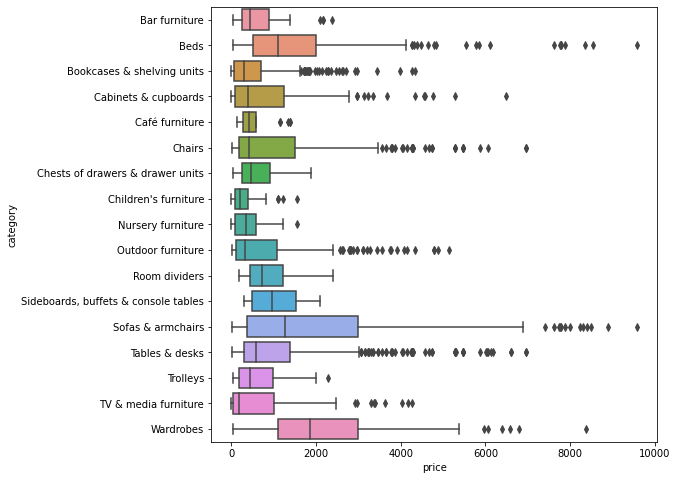

In [190]:
plt.subplots(figsize=(8,8))
sns.boxplot(data=df, x='price', y='category')
plt.show()

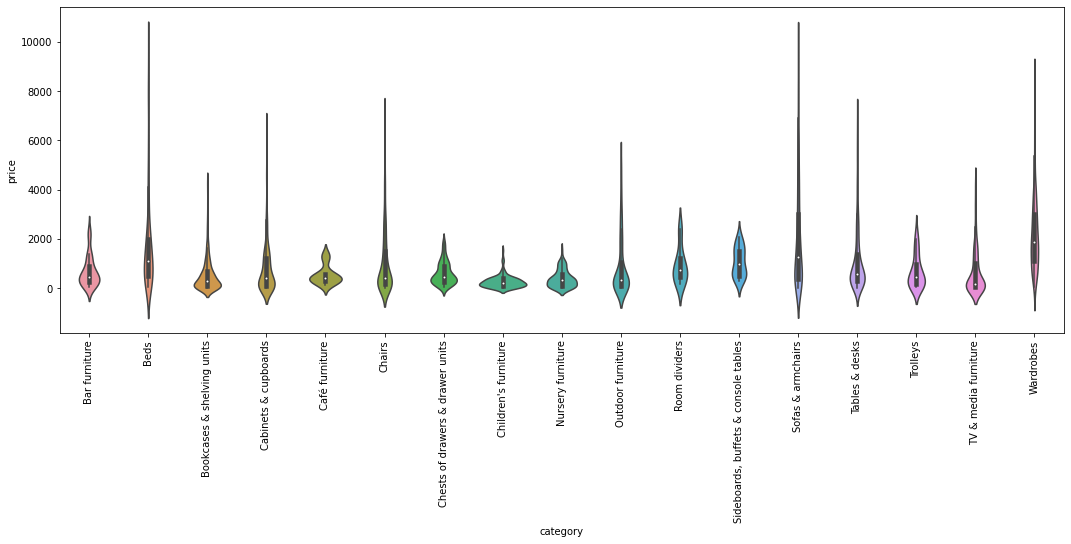

In [171]:
plt.subplots(figsize=(18,6))
sns.violinplot(data=df, y='price', x='category')
plt.xticks(rotation=90)
plt.show()

### It is essential to compare how the prices of items with other colors and without
### are distributed, for this we will build next plot 

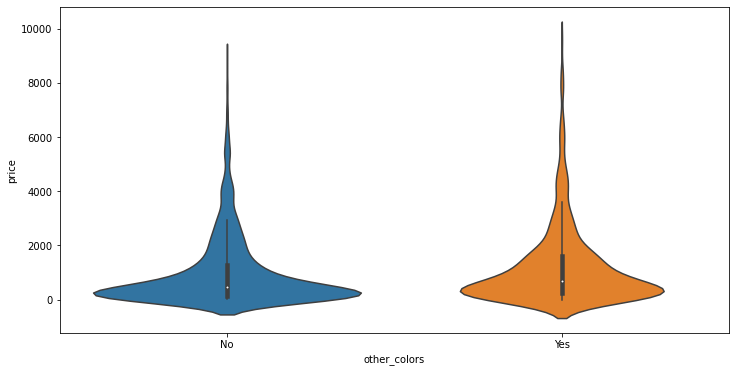

In [172]:
plt.subplots(figsize=(12,6))
sns.violinplot(data=df, y='price', x='other_colors')
plt.show()

### Further we created new dataframe to built plot on essental datas 

In [173]:
dataset = df[['category', 'price','other_colors', 'depth', 'height', 'width']]


In [174]:
dataset

,category,price,other_colors,depth,height,width
0,Bar furniture,265.0,No,NaN,99.0,51.0
1,Bar furniture,995.0,No,NaN,105.0,80.0
2,Bar furniture,2095.0,No,NaN,NaN,NaN
3,Bar furniture,69.0,Yes,50.0,100.0,60.0
4,Bar furniture,225.0,No,60.0,43.0,74.0
...,...,...,...,...,...,...
3689,Wardrobes,750.0,No,50.0,NaN,91.0
3690,Wardrobes,1572.0,No,50.0,NaN,135.0
3691,Wardrobes,924.0,No,50.0,NaN,175.0
3692,Wardrobes,2745.0,No,50.0,NaN,178.0


In [175]:
dataset.isnull().sum()

category           0
price              0
other_colors       0
depth           1463
height           988
width            589
dtype: int64

### Pairplot is chosen to see correlation of price from dimensions, availability of other colors and category

NameError: name 'grid' is not defined

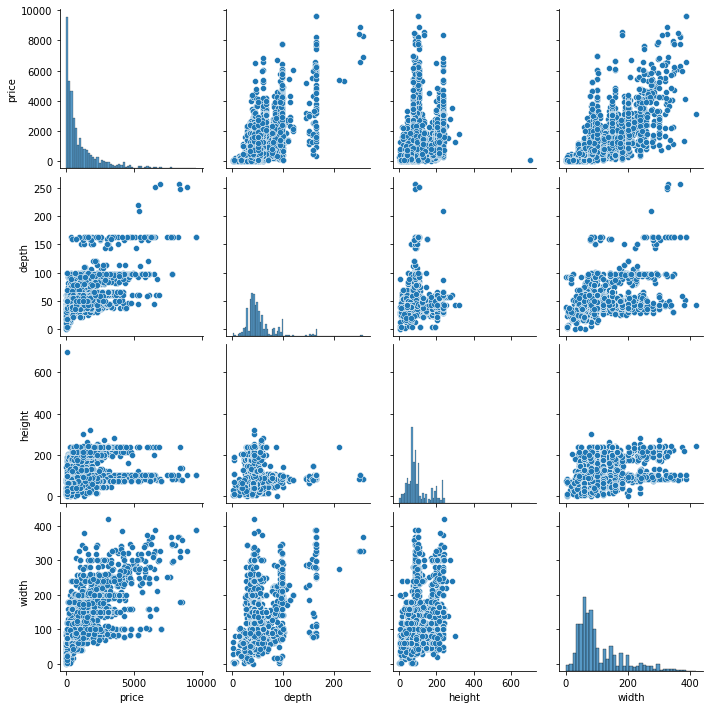

In [176]:
#sns.pairplot(dataset, hue = 'other colors')

sns.pairplot(dataset);
grid.show()

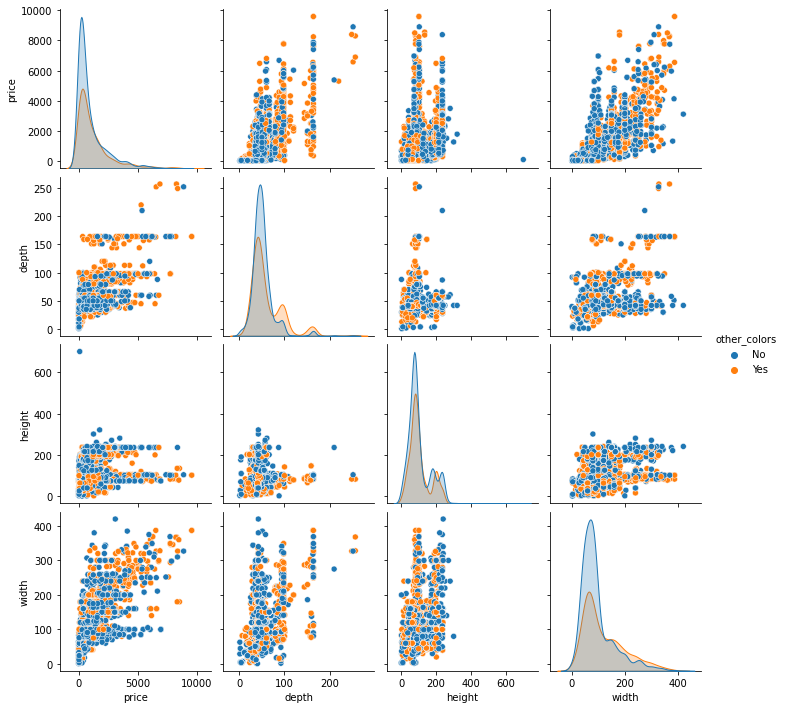

In [177]:

sns.pairplot(dataset, hue = 'other_colors');

### Looks like that prices for items which have other colors and one color have equal distribution

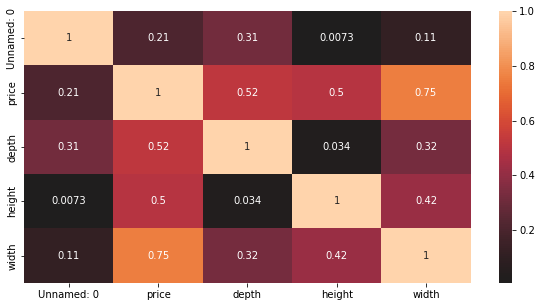

In [178]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(method='spearman'), xticklabels=df.corr().columns, yticklabels=df.corr().columns, center=0, annot=True)
plt.show()

### Corelation matrix show us some corelation between the price and dimensions of the items. After all these EDA we can start hypothesis chosing

# Hypothesis validation

### As we assumed before, prices had lognormal distribution. If accidental value of the row has lognormal distribution it means that its logarithms have normal distribution. Our first hypothesis H_0 will assume it.


0       2.423246
1       2.997823
2       3.321184
3       1.838849
4       2.352183
          ...   
3689    2.875061
3690    3.196453
3691    2.965672
3692    3.438542
3693    3.090258
Name: price, Length: 3694, dtype: float64


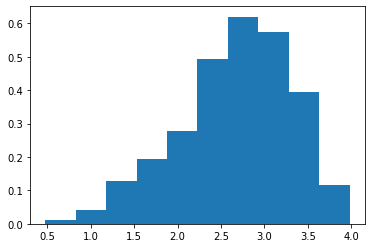

In [180]:
plt.hist(np.log10(df.price), bins=10,density=True)
print(np.log10(df.price))


### Further we will accomplish data standartisation

0      -0.376554
1       0.513381
2       1.014219
3      -1.281697
4      -0.486620
          ...   
3689    0.323241
3690    0.821029
3691    0.463584
3692    1.195990
3693    0.656549
Name: price, Length: 3694, dtype: float64


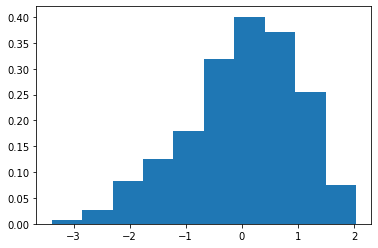

In [181]:

sample_h = (np.log10(df.price)-np.log10(df.price).mean())/np.log10(df.price).std()
print(sample_h)
hist_h = plt.hist(sample_h, bins=10,density=True)

### We will use Shapiro criteria to check if distribution is normal 

In [182]:
h0_1_p_value = stats.shapiro(sample_h).pvalue
h0_1_p_value_1 = stats.shapiro(np.log10(df.price)).pvalue
h0_1_p_value_2 = stats.kstest(sample_h, cdf=stats.norm.cdf).pvalue
h0_1_p_value_3 = stats.normaltest(sample_h).pvalue
h0_1_p_value_4 = stats.ks_2samp(sample_h, stats.norm.rvs(size=len(sample_h))).pvalue
h0_1_p_value_5 = stats.mannwhitneyu(sample_h, stats.norm.rvs(size=len(sample_h))).pvalue

print(f'p-value:',h0_1_p_value,h0_1_p_value_1,h0_1_p_value_2,h0_1_p_value_3,h0_1_p_value_4,h0_1_p_value_5,
      sep="\n")

p-value:
5.4628254810538666e-24
5.417151223502475e-24
1.7777088115412767e-10
1.337202698503772e-32
1.0574606896333863e-06
0.015180165787844398


(array([0.01158702, 0.        , 0.        , 0.03089873, 0.01158702,
        0.        , 0.02703639, 0.03089873, 0.02317405, 0.13131961,
        0.07724683, 0.08497151, 0.05407278, 0.24332751, 0.18539239,
        0.22015346, 0.17380536, 0.18925473, 0.16994302, 0.21629112,
        0.12359492, 0.47120565, 0.11973258, 0.30512497, 0.36306009,
        0.6063876 , 0.34761073, 0.48665502, 0.41713287, 0.61024994,
        0.74156955, 0.61024994, 0.64887336, 0.57548887, 0.52527843,
        0.68749677, 0.43644458, 0.57548887, 0.61024994, 0.56776419,
        0.45961863, 0.47120565, 0.40940819, 0.30126263, 0.33988604,
        0.18925473, 0.16221834, 0.12359492, 0.06179746, 0.03862341]),
 array([0.47712125, 0.54721067, 0.61730009, 0.68738951, 0.75747892,
        0.82756834, 0.89765776, 0.96774718, 1.03783659, 1.10792601,
        1.17801543, 1.24810484, 1.31819426, 1.38828368, 1.4583731 ,
        1.52846251, 1.59855193, 1.66864135, 1.73873077, 1.80882018,
        1.8789096 , 1.94899902, 2.01908843, 2.

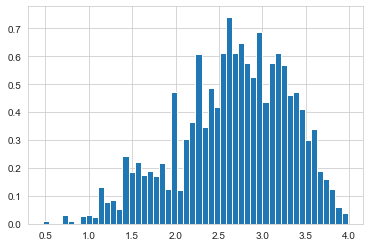

In [237]:
plt.hist(np.log10(df.price), bins=50,density=True)

### We can see that p-value is too small. 0.05 it should be to prove this hypothesis. We can add quantity of bins to check it again.

(array([0.01622183, 0.        , 0.        , 0.        , 0.02703639,
        0.01622183, 0.01622183, 0.        , 0.        , 0.03785095,
        0.04325822, 0.00540728, 0.02703639, 0.18384745, 0.02162911,
        0.09192373, 0.11355284, 0.07570189, 0.29199301, 0.28117845,
        0.02703639, 0.22710567, 0.12977467, 0.19466201, 0.26495662,
        0.23792023, 0.01622183, 0.28658573, 0.11896012, 0.33525123,
        0.38932401, 0.15681106, 0.2703639 , 0.55694963, 0.10814556,
        0.47584046, 0.5407278 , 0.37850946, 0.42176768, 0.63265152,
        0.24873479, 0.75701892, 0.79486986, 0.62183697, 0.52450596,
        0.83272081, 0.45961863, 0.58398602, 0.52450596, 0.49746957,
        0.65968791, 0.5407278 , 0.64346608, 0.52450596, 0.64346608,
        0.51909868, 0.44880407, 0.54613507, 0.38391674, 0.44339679,
        0.35688035, 0.23792023, 0.35688035, 0.2216984 , 0.13518195,
        0.17844017, 0.11896012, 0.0486655 , 0.08110917, 0.02162911]),
 array([0.47712125, 0.52718512, 0.57724899, 0.

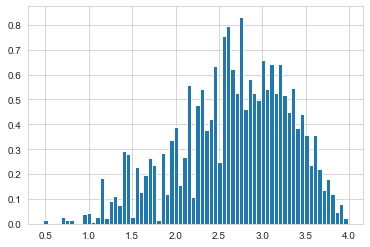

In [238]:
plt.hist(np.log10(df.price), bins=70,density=True)

### We can see multiples outliers from both sides. We should reject h_0.

,price
0,-0.591574
1,-0.060531
2,0.739672
3,-0.734155
4,-0.620672
...,...
3689,-0.238757
3690,0.359212
3691,-0.112180
3692,1.212519


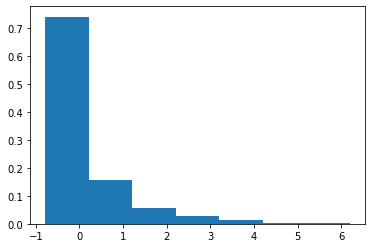

In [192]:
sample_h_2 = pd.DataFrame(((df.price)-(df.price).mean())/(df.price).std())
hist_h_2 = plt.hist(sample_h_2, bins=7,density=True)
sample_h_2

## We will check h_1 hypothesis which assumes that prices for items with one color don't have difference with prices for items with different colors


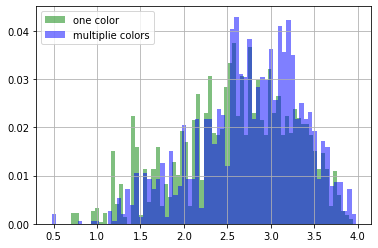

In [184]:
one_color = df[df['other_colors'] == 'No']['price'].apply(np.log10)
mult_color = df[df['other_colors'] == 'Yes']['price'].apply(np.log10)
one_color.name, mult_color.name = 'one color', 'multiplie colors'

one_color.hist(alpha=0.5, color='green', weights=[1./len(one_color)]*len(one_color), bins=70)
mult_color.hist(alpha=0.5, color='blue', weights=[1./len(mult_color)]*len(mult_color), bins=70)

plt.legend([one_color.name, mult_color.name])

### As we saw, prices didn't have normal distribution. So we will apply Mann–Whitney U test to check this hypothesis 

In [185]:
stats.mannwhitneyu(one_color, mult_color).pvalue

8.029293283507823e-12

### p-value is small so Hypothesis h_1 is rejected. Prices for items with different colors and for one colors are different

### We can also apply Student ctiteria to check this hypothesis


In [186]:
stats.ttest_ind(one_color, mult_color, equal_var=False).pvalue

6.736250022293649e-13

### We have got low value so hypothesis is rejected

# Prediction of the prices

### We already drop 'useless' columns and what is left is to clean some columns from 'rubish'

### After we deleted some columns, we will clean "designer” column from "rubbish”as "Francis Cayouette/K Hagberg/M Hagberg Hagberg/M Hagberg/Francis Cayouette". We can see that rows with the different formulations has the same designers, also we have figures which we need to clean


In [198]:
df['designer'].value_counts()

IKEA of Sweden                                                                                                                                                                                                                                                                                                                                                                                                                  828
Ehlén Johansson                                                                                                                                                                                                                                                                                                                                                                                                                 161
Francis Cayouette                                                                                                                                               

### lower we will create the function wich will 'clean' designer column:

In [187]:
def cleanDesigners(value, removeIKEA=False, emptyValue=np.nan):
    # if row is not the str, we return value:
    if not isinstance(value, str):
        return value
    #if row begins with letter, we return empty value
    if len(value)>0 and value[0].isdigit():
        return emptyValue
    #split the row by '/'
    designers = value.split("/")
    if removeIKEA:
        #try to remouve "IKEA of Sweden"
        try:
            designers.remove("IKEA of Sweden")
        except:
            pass
    if len(designers) > 0:
        #return the row which is sortered by the name of disiners
        return '/'.join(sorted(designers))
    else:
        #or empty row if the list is empty 
        return emptyValue

### Now we will use function to clean this column:
### We will add new column  designer_clean - the field 'designer' without the 'rubish' with the list of designers sorted. Empty values we will fill in with "IKEA of Sweden"

In [188]:

df["designer_clean"] = df["designer"].apply(cleanDesigners, args=(False, "IKEA of Sweden")) #error to nan
df["designer_clean"].value_counts()

IKEA of Sweden                                                     971
Ehlén Johansson                                                    161
Francis Cayouette                                                  151
Ehlén Johansson/IKEA of Sweden                                     145
Ola Wihlborg                                                       134
                                                                  ... 
Eva Lilja Löwenhielm/IKEA of Sweden/Jon Karlsson                     1
A Huldén/S Dahlman                                                   1
Ehlén Johansson/Fredriksson/Hilland/IKEA of Sweden/L Löwenhielm      1
Malin Unnborn                                                        1
Lars Norinder                                                        1
Name: designer_clean, Length: 199, dtype: int64

### After cleaning, we have 199 nunique rows for 'designer_clean' and we had 381 rows for 'designer'

In [197]:
df.isnull().sum()

Unnamed: 0           0
category             0
price                0
old_price            0
other_colors         0
designer             0
depth             1463
height             988
width              589
designer_clean       0
dtype: int64

In [189]:
df.nunique()

Unnamed: 0        3694
category            17
price              979
old_price          365
other_colors         2
designer           381
depth              114
height             193
width              263
designer_clean     199
dtype: int64

### Futher we will use SimpleImputer to fill in empty rows in columns of dimenssions. Also we will transform categorical variables in to digital form. As categories  are not ordered we will use OneHotEncodeand and  will build relevant Pipeline. Scikit-Learn gives us Pipeline class to make all needed transformations. As we need to predict the price we will use DecisionTreeRegressor() to make prediction.

In [199]:
# df1 = df
X = df[['depth','width','height','category','designer_clean','other_colors']]
#X = df1[['depth','width','height','category']]
Y = df['price']
X_train, X_test, Y_train, Y_test = sk.model_selection.train_test_split(X, Y, test_size=0.2, random_state=42)

numeric_transf = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('impute', SimpleImputer(strategy='median'))
])

categorical_transf = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

col_prepr = ColumnTransformer(transformers=[
    ('numeric', numeric_transf, ['depth','width','height']),
    ('categorical', categorical_transf, ['category','designer_clean','other_colors'])
])

dtr = Pipeline(steps=[
    ('col_prep', col_prepr),
    # ('dtr', RandomForestRegressor(max_depth = 100))
    ('dtr', DecisionTreeRegressor(max_depth = 10, random_state=42))
])

dtr.fit(X_train, Y_train)
dtr_predict = dtr.predict(X_test)
print('R^2 : {:.5f}'.format(dtr.score(X_test, Y_test)))
print('MAE : {:.5f}'.format(sk.metrics.mean_absolute_error(dtr_predict, Y_test)))
print('MSE : {:.5f}'.format(np.sqrt(sk.metrics.mean_squared_error(dtr_predict, Y_test))))

R^2 : 0.74147
MAE : 396.26201
MSE : 705.91036


### This is the result of our first model:

In [ ]:
R^2 : 0.74147
MAE : 396.26201
MSE : 705.91036

### In order to make prognosis better we can undertake next steps: 
#### Choose another approach toward filling the empty rows
#### Use another Encoder for categories and designers Use another regressor
#### Choose optimal parameters of the regressor

### In previous model we used median value to fill in empty rows. It was not the best practice as different categories had different dimensions. So it will be correct to group all rows by categories  and then fill in empty values using average(median) value for each category. Probably, we could encode categories and designers by average (median) price for each category.



In [221]:
df["other_colors_1"] = df["other_colors"].map(dict(Yes=1, No=0))

#here we will calculate average value of each dimenssion for each category:
median_d = df.groupby(['category'])['depth'].median()
median_h = df.groupby(['category'])['height'].median()
median_w = df.groupby(['category'])['width'].median()

median_price = df.groupby(['category'])['price'].median()
median_dsgn = df.groupby(['designer_clean'])['price'].median()

df = df.set_index(['category'])
df['depth_1'] = df['depth'].fillna(median_d)
df['height_1'] = df['height'].fillna(median_h)
df['width_1'] = df['width'].fillna(median_w)
df['category_median_price'] = median_price
df = df.reset_index()

df = df.set_index(['designer_clean'])
df['designer_median_price'] = median_dsgn
df = df.reset_index()

df.head()

,designer_clean,category,designer_clean_2,Unnamed: 0,price,old_price,other_colors,designer,depth,height,width,other_colors_1,depth_1,height_1,width_1,category_median_price,designer_median_price,designer_median_price2
0,Nicholai Wiig Hansen,Bar furniture,Nicholai Wiig Hansen,0,265.0,No old price,No,Nicholai Wiig Hansen,NaN,99.0,51.0,0,47.0,99.0,51.0,445.0,265.0,265.0
1,Francis Cayouette,Bar furniture,Francis Cayouette,1,995.0,No old price,No,Francis Cayouette,NaN,105.0,80.0,0,47.0,105.0,80.0,445.0,458.0,461.5
2,Francis Cayouette,Bar furniture,Francis Cayouette,2,2095.0,No old price,No,Francis Cayouette,NaN,NaN,NaN,0,47.0,102.0,48.0,445.0,458.0,461.5
3,Henrik Preutz,Bar furniture,Henrik Preutz,3,69.0,No old price,Yes,Henrik Preutz,50.0,100.0,60.0,1,50.0,100.0,60.0,445.0,495.0,795.0
4,Marcus Arvonen,Bar furniture,Marcus Arvonen,4,225.0,No old price,No,Marcus Arvonen,60.0,43.0,74.0,0,60.0,43.0,74.0,445.0,150.0,1370.0


### For making procedure of choosing of parameters and samples simplier, we will create procedure which will take samples as an input and compute evaluation for different regressors. For this we will need function  getBestRegressor. 

In [227]:

def getBestRegressor(X, Y):
    X_train, X_test, Y_train, Y_test = sk.model_selection.train_test_split(X, Y, test_size=0.2, random_state=42)
    models = [
      sk.linear_model.LinearRegression(),
      sk.linear_model.LassoCV(),
      sk.linear_model.RidgeCV(),
      sk.svm.SVR(kernel='linear'),
      sk.neighbors.KNeighborsRegressor(n_neighbors=16),
      sk.tree.DecisionTreeRegressor(max_depth=10, random_state=42),
      RandomForestRegressor(random_state=42),
      GradientBoostingRegressor()
    ]

    TestModels = pd.DataFrame()
    res = {}
    tmp = {}
    #for each model in the list
    for model in models:
        #we get the name of the model
        m = str(model)
        tmp['Model'] = m[:m.index('(')]
        #train the model 
        model.fit(X_train, Y_train)
        # compute R^2 - coefficient of determonation
        tmp['R^2'] = '{:.5f}'.format(model.score(X_test, Y_test))
        # compute MAE - Mean Absolute Error
        tmp['MAE'] = '{:.5f}'.format(sk.metrics.mean_absolute_error(model.predict(X_test), Y_test))
        # compute RMSE - Root Mean Square Error
        tmp['RMSE'] = '{:.5f}'.format(np.sqrt(sk.metrics.mean_squared_error(model.predict(X_test), Y_test)))

        # record datas and final DataFrame
        TestModels = TestModels.append([tmp])
    # Create index on name of the model 
    TestModels.set_index('Model', inplace=True)
    res['model'] = TestModels
    res['X_train'] = X_train
    res['Y_train'] = Y_train
    res['X_test'] = X_test
    res['Y_test'] = Y_test
    return res

## Test # 1.
### We will take dimensions  which were filled in with median for each category, categories and designers encoded with median price. We will check the type of regressor, which will show the best result and how model evaluation, based on DecisionTreeRegressor() will be changed. 


In [228]:
X1 = df[['width_1','depth_1','height_1','category_median_price','designer_median_price','other_colors_1']]
Y1 = df['price']

test1 = getBestRegressor(X1, Y1)
test1['model'].sort_values(by='R^2', ascending=False)

/var/folders/h5/kzwd099s6x398dbh4mj00pyc0000gn/T/ipykernel_57738/520570541.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  TestModels = TestModels.append([tmp])
/var/folders/h5/kzwd099s6x398dbh4mj00pyc0000gn/T/ipykernel_57738/520570541.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  TestModels = TestModels.append([tmp])
/var/folders/h5/kzwd099s6x398dbh4mj00pyc0000gn/T/ipykernel_57738/520570541.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  TestModels = TestModels.append([tmp])
/var/folders/h5/kzwd099s6x398dbh4mj00pyc0000gn/T/ipykernel_57738/520570541.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  TestModels = TestM

,R^2,MAE,RMSE
Model,,,
RandomForestRegressor,0.83172,295.91918,569.52431
GradientBoostingRegressor,0.80952,361.15451,605.93247
DecisionTreeRegressor,0.78065,355.57681,650.23047
KNeighborsRegressor,0.71331,422.40003,743.35993
RidgeCV,0.70158,481.15383,758.41409
LinearRegression,0.70156,481.28499,758.43942
LassoCV,0.70152,473.40099,758.49673
SVR,0.68826,448.43841,775.16172


In [229]:
Y1.shape

(3694,)

### The best result was obtained with RandomForestRegressor
### DecisionTreeRegressor also shows better result.  R^2 = 0.78065. Before we had  0.74147

## Test # 2
### We will delete all rows with empty values. Category and price are coded with median price

In [230]:
df2 = df.dropna(subset=['width','height','depth'])
X2 = df2[['width','depth','height','category_median_price','designer_median_price','other_colors_1']]
Y2 = df2['price']

test2 = getBestRegressor(X2, Y2)
test2['model'].sort_values(by='R^2', ascending=False)

/var/folders/h5/kzwd099s6x398dbh4mj00pyc0000gn/T/ipykernel_57738/520570541.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  TestModels = TestModels.append([tmp])
/var/folders/h5/kzwd099s6x398dbh4mj00pyc0000gn/T/ipykernel_57738/520570541.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  TestModels = TestModels.append([tmp])
/var/folders/h5/kzwd099s6x398dbh4mj00pyc0000gn/T/ipykernel_57738/520570541.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  TestModels = TestModels.append([tmp])
/var/folders/h5/kzwd099s6x398dbh4mj00pyc0000gn/T/ipykernel_57738/520570541.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  TestModels = TestM

,R^2,MAE,RMSE
Model,,,
RandomForestRegressor,0.88104,326.01461,570.81199
GradientBoostingRegressor,0.86167,363.87183,615.53242
DecisionTreeRegressor,0.83272,374.27473,676.87191
RidgeCV,0.75505,538.95780,819.07733
LinearRegression,0.75501,538.99756,819.14734
LassoCV,0.75392,537.33236,820.96933
SVR,0.70911,535.16390,892.59118
KNeighborsRegressor,0.69924,530.56115,907.60544


In [231]:
Y2.shape

(1899,)

### Evaluation of R^2 models were improved. The best result still was obtained with RandomForestRegressor.
### DecisionTreeRegressor also shows better result.  R^2 = 0.83272. Before we had 0.74147 and 0.78065. But MAE increased. It is because in previous model we filled in empty values of dimenssions  with median values, within the category for each value. If we look to the shape of the Y1 set, than we will se that before deleting of the empty values we had 3694 rows for Y1 and after deleting we had 1899, so 1795 rows were filled in with median value 

## Test # 3

### Now we will delete "IKEA of Sweden"  from the list of designers for case if this list contains other last_names

In [232]:
df["designer_clean_2"] = df["designer"].apply(cleanDesigners, args=(True, "IKEA of Sweden"))

median_dsgn2 = df.groupby(['designer_clean_2'])['price'].median()

df = df.set_index(['designer_clean_2'])
df['designer_median_price2'] = median_dsgn2
df = df.reset_index()

df["designer_clean_2"].value_counts()

IKEA of Sweden                        971
Ehlén Johansson                       306
Jon Karlsson                          170
Ola Wihlborg                          165
Francis Cayouette                     164
                                     ... 
E Thomasson/P Süssmann                  1
Magnus Elebäck                          1
Andreas Fredriksson/Marcus Arvonen      1
Lars Norinder                           1
Lisel Garsveden                         1
Name: designer_clean_2, Length: 157, dtype: int64

In [233]:
df3 = df.dropna(subset=['width','depth','height'])
X3 = df3[['width','depth','height','category_median_price','designer_median_price2','other_colors_1']]
Y3 = df3['price']

test3 = getBestRegressor(X3, Y3)
test3['model'].sort_values(by='R^2', ascending=False)

/var/folders/h5/kzwd099s6x398dbh4mj00pyc0000gn/T/ipykernel_57738/520570541.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  TestModels = TestModels.append([tmp])
/var/folders/h5/kzwd099s6x398dbh4mj00pyc0000gn/T/ipykernel_57738/520570541.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  TestModels = TestModels.append([tmp])
/var/folders/h5/kzwd099s6x398dbh4mj00pyc0000gn/T/ipykernel_57738/520570541.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  TestModels = TestModels.append([tmp])
/var/folders/h5/kzwd099s6x398dbh4mj00pyc0000gn/T/ipykernel_57738/520570541.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  TestModels = TestM

,R^2,MAE,RMSE
Model,,,
RandomForestRegressor,0.88129,326.26835,570.19801
GradientBoostingRegressor,0.86096,372.80505,617.10756
DecisionTreeRegressor,0.80632,403.59155,728.33313
KNeighborsRegressor,0.74884,502.31689,829.39507
LassoCV,0.74099,555.87528,842.26185
RidgeCV,0.74099,557.54451,842.25115
LinearRegression,0.74095,557.58138,842.32463
SVR,0.69356,554.12453,916.12583


### The resul is almost the same. The best result was obtained with using RandomForestRegressor in test #3. 

### Using  GridSearchCV function we will accomplish cross-validaion and choose optimal parameters for RandomForestRegressor. GridSearchCV from Scikit-Learn, accomplishes grid search. Everything  we need is which parameters we will use for experiment and which values to try. When we have no idea wich values to use  for hyperparameter, then simple approach is to try consequence of 10  powers.

Fitting 5 folds for each of 120 candidates, totalling 600 fits


/Users/Axele/PycharmProjects/pythonProject/venv/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/Axele/PycharmProjects/pythonProject/venv/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/Axele/PycharmProjects/pythonProject/venv/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitl

  warn(
/Users/Axele/PycharmProjects/pythonProject/venv/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/Axele/PycharmProjects/pythonProject/venv/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/Axele/PycharmProjects/pythonProject/venv/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, e

/Users/Axele/PycharmProjects/pythonProject/venv/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/Axele/PycharmProjects/pythonProject/venv/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/Axele/PycharmProjects/pythonProject/venv/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitl

/Users/Axele/PycharmProjects/pythonProject/venv/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/Axele/PycharmProjects/pythonProject/venv/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/Axele/PycharmProjects/pythonProject/venv/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitl

/Users/Axele/PycharmProjects/pythonProject/venv/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/Axele/PycharmProjects/pythonProject/venv/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/Axele/PycharmProjects/pythonProject/venv/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitl

/Users/Axele/PycharmProjects/pythonProject/venv/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/Axele/PycharmProjects/pythonProject/venv/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/Axele/PycharmProjects/pythonProject/venv/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitl

/Users/Axele/PycharmProjects/pythonProject/venv/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/Axele/PycharmProjects/pythonProject/venv/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/Axele/PycharmProjects/pythonProject/venv/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitl

/Users/Axele/PycharmProjects/pythonProject/venv/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/Axele/PycharmProjects/pythonProject/venv/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/Axele/PycharmProjects/pythonProject/venv/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitl

/Users/Axele/PycharmProjects/pythonProject/venv/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/Axele/PycharmProjects/pythonProject/venv/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/Axele/PycharmProjects/pythonProject/venv/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitl

Best Estimator : RandomForestRegressor(max_depth=200, max_features='log2', n_estimators=120)
Best Score     : 0.8635889588145547

R^2            : 0.87266
MAE            : 333.11834
RMSE           : 590.56631

Feature importance:
--------------------------------
0.42082    width
0.19761    depth
0.10043    height
0.10720    category_median_price
0.15890    designer_median_price
0.01504    other_colors_1


<AxesSubplot:>

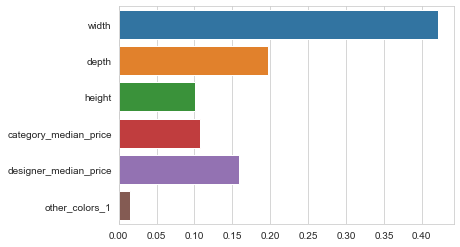

In [234]:
from sklearn.model_selection import GridSearchCV

X_train, X_test, Y_train, Y_test = sk.model_selection.train_test_split(X2, Y2, test_size=0.2, random_state=42)
forest_grid = GridSearchCV(RandomForestRegressor(), {'n_estimators': [10,50,100,110,120,130, 140,150,200,500],
                                                     'max_depth': [10,100,200,None], 'max_features':
                                                     ['auto','sqrt','log2']}, cv=5, n_jobs=-1, verbose=3)
forest_grid.fit(X_train, Y_train)

print('Best Estimator :',forest_grid.best_estimator_)
print('Best Score     :',forest_grid.best_score_)
print('')
print('R^2            : {:.5f}'.format(sk.metrics.r2_score(Y_test, forest_grid.predict(X_test))))
print('MAE            : {:.5f}'.format(sk.metrics.mean_absolute_error(forest_grid.predict(X_test), Y_test)))
print('RMSE           : {:.5f}'.format(np.sqrt(sk.metrics.mean_squared_error(forest_grid.predict(X_test), Y_test))))
print('')
print('Feature importance:')
print('--------------------------------')
for feat, importance in zip(X_train.columns, forest_grid.best_estimator_.feature_importances_):
    print('{:.5f}    {f}'.format(importance, f=feat))

sns.set_style('whitegrid')
sns.barplot(y=X_train.columns, x=forest_grid.best_estimator_.feature_importances_)

<AxesSubplot:xlabel='price'>

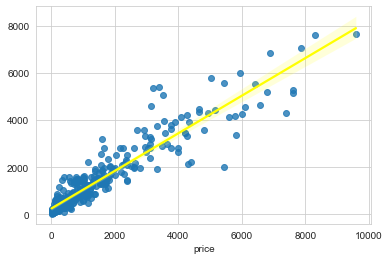

[CV 3/5] END max_depth=10, max_features=auto, n_estimators=10;, score=0.836 total time=   0.1s
[CV 3/5] END max_depth=10, max_features=auto, n_estimators=50;, score=0.874 total time=   0.5s
[CV 2/5] END max_depth=10, max_features=auto, n_estimators=100;, score=0.875 total time=   0.9s
[CV 5/5] END max_depth=10, max_features=auto, n_estimators=100;, score=0.811 total time=   0.7s
[CV 4/5] END max_depth=10, max_features=auto, n_estimators=110;, score=0.871 total time=   0.7s
[CV 3/5] END max_depth=10, max_features=auto, n_estimators=120;, score=0.868 total time=   0.8s
[CV 2/5] END max_depth=10, max_features=auto, n_estimators=130;, score=0.877 total time=   1.0s
[CV 1/5] END max_depth=10, max_features=auto, n_estimators=140;, score=0.842 total time=   1.0s
[CV 5/5] END max_depth=10, max_features=auto, n_estimators=140;, score=0.803 total time=   1.2s
[CV 4/5] END max_depth=10, max_features=auto, n_estimators=150;, score=0.874 total time=   1.1s
[CV 3/5] END max_depth=10, max_features=au

[CV 1/5] END max_depth=None, max_features=sqrt, n_estimators=100;, score=0.835 total time=   0.7s
[CV 4/5] END max_depth=None, max_features=sqrt, n_estimators=100;, score=0.874 total time=   0.6s
[CV 2/5] END max_depth=None, max_features=sqrt, n_estimators=110;, score=0.873 total time=   0.6s
[CV 5/5] END max_depth=None, max_features=sqrt, n_estimators=110;, score=0.828 total time=   0.8s
[CV 3/5] END max_depth=None, max_features=sqrt, n_estimators=120;, score=0.884 total time=   0.6s
[CV 2/5] END max_depth=None, max_features=sqrt, n_estimators=130;, score=0.878 total time=   0.7s
[CV 1/5] END max_depth=None, max_features=sqrt, n_estimators=140;, score=0.838 total time=   0.7s
[CV 5/5] END max_depth=None, max_features=sqrt, n_estimators=140;, score=0.825 total time=   0.8s
[CV 4/5] END max_depth=None, max_features=sqrt, n_estimators=150;, score=0.872 total time=   0.8s
[CV 3/5] END max_depth=None, max_features=sqrt, n_estimators=200;, score=0.886 total time=   1.1s
[CV 2/5] END max_dep

[CV 2/5] END max_depth=10, max_features=auto, n_estimators=10;, score=0.874 total time=   0.1s
[CV 2/5] END max_depth=10, max_features=auto, n_estimators=50;, score=0.878 total time=   0.5s
[CV 1/5] END max_depth=10, max_features=auto, n_estimators=100;, score=0.834 total time=   0.9s
[CV 1/5] END max_depth=10, max_features=auto, n_estimators=110;, score=0.837 total time=   0.8s
[CV 5/5] END max_depth=10, max_features=auto, n_estimators=110;, score=0.806 total time=   0.7s
[CV 4/5] END max_depth=10, max_features=auto, n_estimators=120;, score=0.874 total time=   0.9s
[CV 3/5] END max_depth=10, max_features=auto, n_estimators=130;, score=0.867 total time=   1.0s
[CV 2/5] END max_depth=10, max_features=auto, n_estimators=140;, score=0.875 total time=   1.1s
[CV 1/5] END max_depth=10, max_features=auto, n_estimators=150;, score=0.837 total time=   1.2s
[CV 5/5] END max_depth=10, max_features=auto, n_estimators=150;, score=0.810 total time=   1.1s
[CV 4/5] END max_depth=10, max_features=au

In [236]:
sns.regplot(x=Y_test, y=forest_grid.predict(X_test),line_kws={'color':'yellow'})